### Removing Outliers

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url_train = 'itrImputed.csv' #traing dataset
url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary

In [3]:
## making dataframe

df_train = pd.read_csv(url_train)
df_dict = pd.read_excel(url_dict)

In [4]:
df_exp = df_train

In [5]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [6]:
df_with_any_null_values = df_train[df_train.columns[df_train.isnull().any()].tolist()]

In [7]:
get_percentage_missing(df_with_any_null_values)

Series([], dtype: float64)

In [8]:
### Function to Removing Outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [9]:
print(len(df_train))
print(len(df_train['VAR4']))

34000
34000


In [10]:
df_exp.columns

Index(['Unnamed: 0', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7',
       'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15',
       'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [11]:
df_exp.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503,High


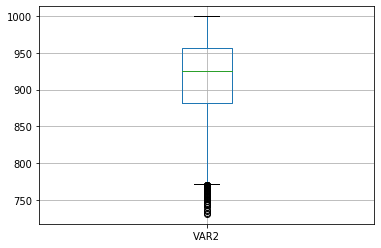

In [12]:
df_train.boxplot(column = 'VAR2')

In [13]:
print(len(df_exp.loc[(df_exp['VAR2'] > 770) & (df_exp['VAR2'] < 1000)]))
df_exp = df_exp.loc[(df_exp['VAR2'] > 770) & (df_exp['VAR2'] < 1000)]

33257


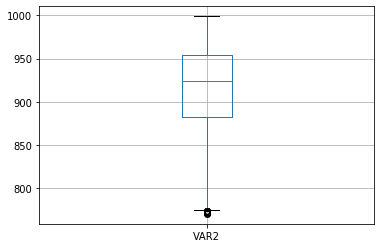

In [14]:
df_exp.boxplot(column = 'VAR2')

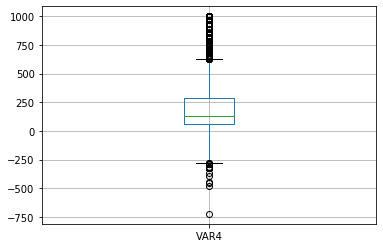

In [15]:
df_train.boxplot(column = 'VAR4')

In [16]:
print(len(df_exp.loc[(df_exp['VAR4'] > -300) & (df_exp['VAR4'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR4'] > -300) & (df_exp['VAR4'] < 600)]

30703


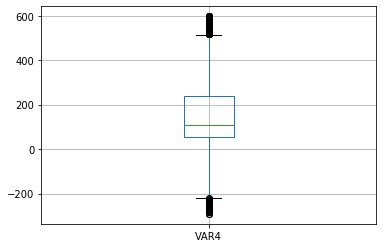

In [17]:
df_exp.boxplot(column = 'VAR4')

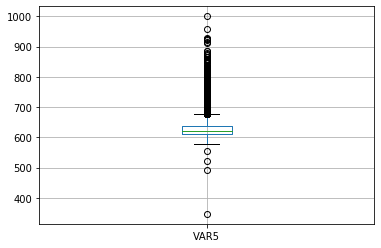

In [18]:
df_train.boxplot(column = 'VAR5')

In [25]:
#df_exp = df_exp.loc[(df_exp['VAR5'] > 600) & (df_exp['VAR5'] < 680)]
print(len(df_exp.loc[(df_exp['VAR5'] > 580) & (df_exp['VAR5'] < 670)]))
df_exp = df_exp.loc[(df_exp['VAR5'] > 580) & (df_exp['VAR5'] < 670)]

28244


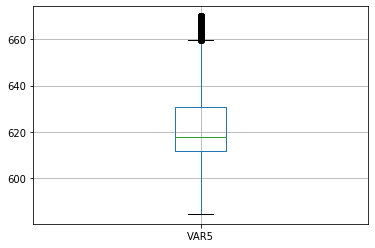

In [26]:
df_exp.boxplot(column = 'VAR5')

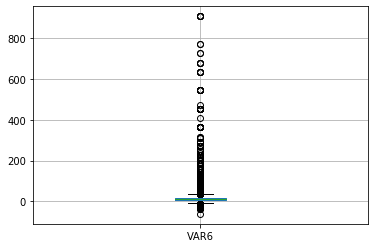

In [27]:
df_train.boxplot(column = 'VAR6')

In [45]:
print(len(df_exp.loc[(df_exp['VAR6'] > -10) & (df_exp['VAR6'] < 100)]))
df_exp = df_exp.loc[(df_exp['VAR6'] > -10) & (df_exp['VAR6'] < 100)]

28028


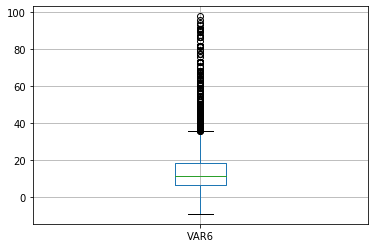

In [46]:
df_exp.boxplot(column = 'VAR6')

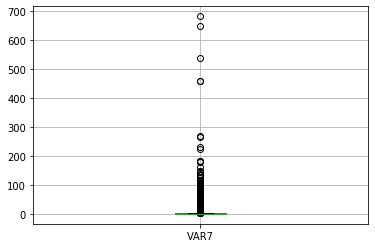

In [47]:
df_train.boxplot(column = 'VAR7')

In [76]:
print(len(df_exp.loc[(df_exp['VAR7'] > 0) & (df_exp['VAR7'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR7'] > 0) & (df_exp['VAR7'] < 5)]

26998


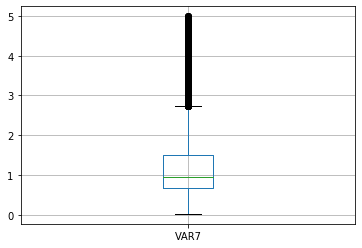

In [77]:
df_exp.boxplot(column = 'VAR7')

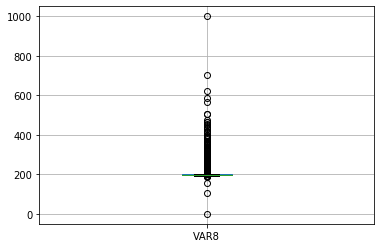

In [78]:
df_train.boxplot(column = 'VAR8')

In [91]:
print(len(df_exp.loc[(df_exp['VAR8'] > 195) & (df_exp['VAR8'] < 204)]))
df_exp = df_exp.loc[(df_exp['VAR8'] > 195) & (df_exp['VAR8'] < 204)]

26374


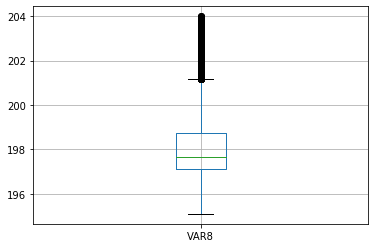

In [92]:
df_exp.boxplot(column = 'VAR8')

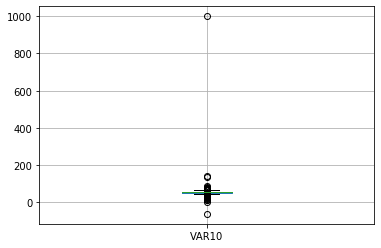

In [93]:
df_train.boxplot(column = 'VAR10')

In [95]:
print(len(df_exp.loc[(df_exp['VAR10'] > 46) & (df_exp['VAR10'] < 60)]))
df_exp = df_exp.loc[(df_exp['VAR10'] > 46) & (df_exp['VAR10'] < 60)]

26037


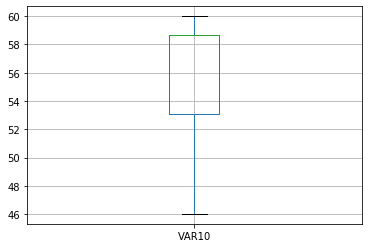

In [96]:
df_exp.boxplot(column = 'VAR10')

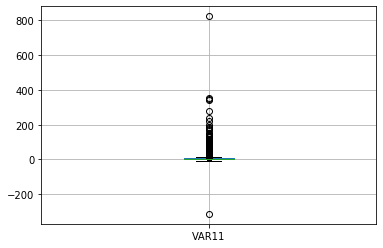

In [97]:
df_train.boxplot(column = 'VAR11')

In [105]:
print(len(df_exp.loc[(df_exp['VAR11'] > -20) & (df_exp['VAR11'] < 40)]))
df_exp = df_exp.loc[(df_exp['VAR11'] > 0) & (df_exp['VAR11'] < 40)]

25869


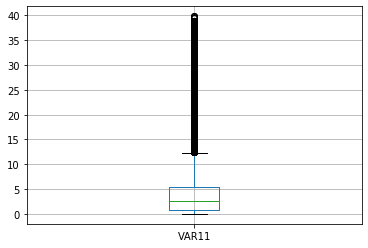

In [106]:
df_exp.boxplot(column = 'VAR11')

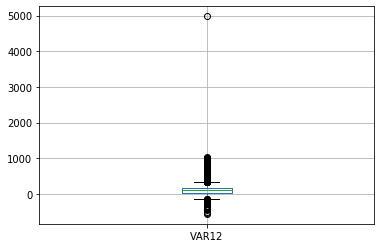

In [107]:
df_train.boxplot(column = 'VAR12')

In [110]:
print(len(df_exp.loc[(df_exp['VAR12'] > -100) & (df_exp['VAR12'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR12'] > -100) & (df_exp['VAR12'] < 600)]

25750


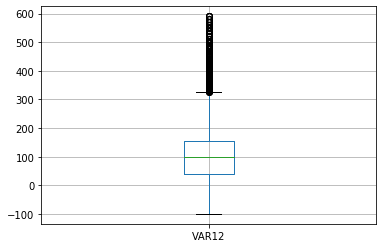

In [111]:
df_exp.boxplot(column = 'VAR12')

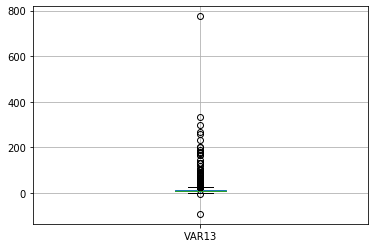

In [112]:
df_train.boxplot(column = 'VAR13')

In [119]:
print(len(df_exp.loc[(df_exp['VAR13'] > 0) & (df_exp['VAR13'] < 50)]))
df_exp = df_exp.loc[(df_exp['VAR13'] > 0) & (df_exp['VAR13'] < 50)]

25682


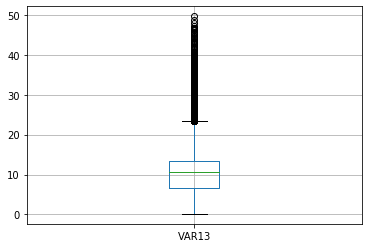

In [121]:
df_exp.boxplot(column = 'VAR13')

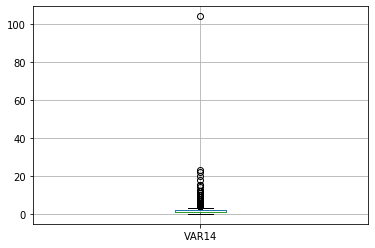

In [122]:
df_train.boxplot(column = 'VAR14')

In [134]:
print(len(df_exp.loc[(df_exp['VAR14'] > 0) & (df_exp['VAR14'] < 6)]))
df_exp = df_exp.loc[(df_exp['VAR14'] > 0) & (df_exp['VAR14'] < 6)]

24935


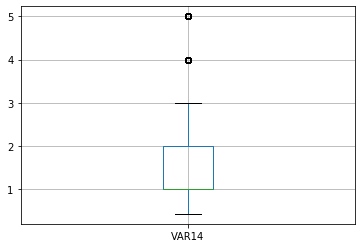

In [135]:
df_exp.boxplot(column = 'VAR14')

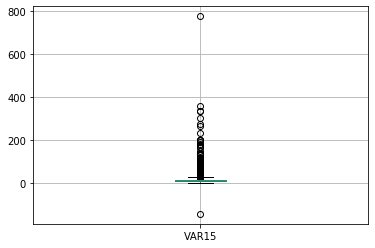

In [136]:
df_train.boxplot(column = 'VAR15')

In [142]:
print(len(df_exp.loc[(df_exp['VAR15'] > 0) & (df_exp['VAR15'] < 50)]))
df_exp = df_exp.loc[(df_exp['VAR15'] > 0) & (df_exp['VAR15'] < 50)]

24918


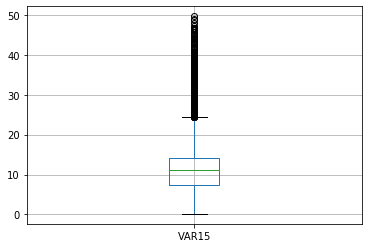

In [143]:
df_exp.boxplot(column = 'VAR15')

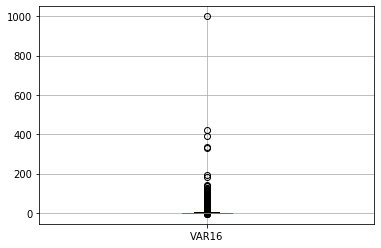

In [144]:
df_train.boxplot(column = 'VAR16')

In [152]:
print(len(df_exp.loc[(df_exp['VAR16'] > 0) & (df_exp['VAR16'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR16'] > 0) & (df_exp['VAR16'] < 5)]

24898


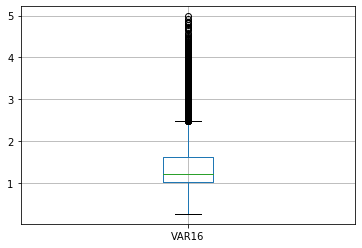

In [153]:
df_exp.boxplot(column = 'VAR16')

In [154]:
len(df_exp)

24898

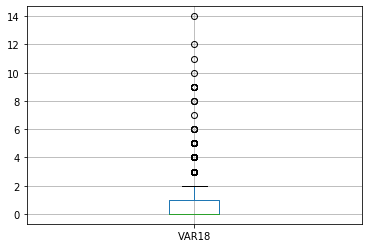

In [155]:
df_train.boxplot(column = 'VAR18')

In [157]:
print(len(df_exp.loc[(df_exp['VAR18'] >= 0) & (df_exp['VAR18'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR18'] >= 0) & (df_exp['VAR18'] < 5)]

24863


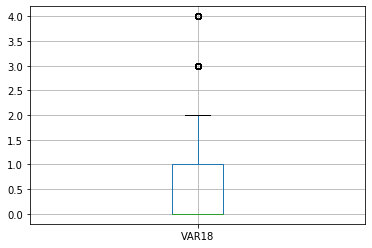

In [158]:
df_exp.boxplot(column = 'VAR18')

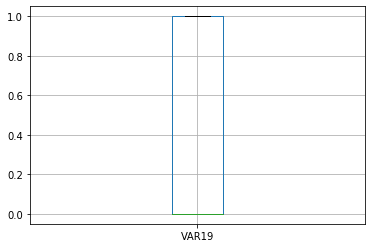

In [159]:
df_train.boxplot(column = 'VAR19')

In [160]:
print(len(df_exp.loc[(df_exp['VAR19'] >= 0) & (df_exp['VAR19'] <= 1)]))
#df_exp = df_exp.loc[(df_exp['VAR19'] >= 0) & (df_exp['VAR19'] <= 1)]

24863


In [161]:
len(df_exp)

24863

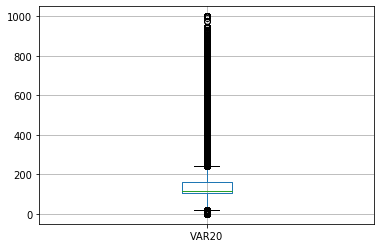

In [162]:
df_train.boxplot(column = 'VAR20')

In [164]:
print(len(df_exp.loc[(df_exp['VAR20'] > 50) & (df_exp['VAR20'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR20'] > 50) & (df_exp['VAR20'] < 600)]

24497


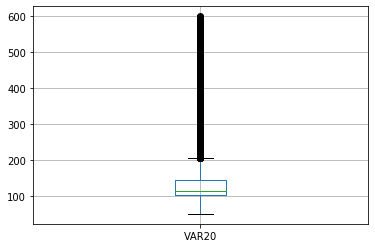

In [165]:
df_exp.boxplot(column = 'VAR20')

##### LDA

In [166]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [167]:
df_exp.columns

Index(['Unnamed: 0', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7',
       'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15',
       'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [168]:
X = df_exp.iloc[:, 2:-1].values
y = df_exp.iloc[:, 19].values

In [169]:
X

array([[ 8.28235294e+02,  1.38888889e-01,  3.21428571e+02, ...,
         1.00000000e+00,  0.00000000e+00,  1.00104991e+02],
       [ 9.11764706e+02,  2.77777780e-02,  2.38761364e+02, ...,
         0.00000000e+00,  1.00000000e+00,  1.46654045e+02],
       [ 9.62352941e+02,  8.33333333e-01,  3.57142857e+01, ...,
         0.00000000e+00,  0.00000000e+00,  9.82495697e+01],
       ...,
       [ 8.85882353e+02, -8.83392108e-01,  2.27789794e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.62972461e+02],
       [ 9.76470588e+02,  1.66666667e-01,  3.57142857e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.08767642e+02],
       [ 9.17647059e+02,  1.38888889e-01,  4.28571429e+02, ...,
         1.00000000e+00,  0.00000000e+00,  5.25886403e+01]])

In [170]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [171]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8253660908470127


C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [173]:
#df_exp.to_csv('outliers_removed_itrImputed.csv')

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\pandas\plotting\_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = 

<Figure size 432x288 with 0 Axes>

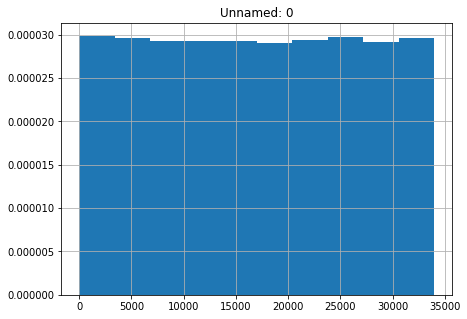

<Figure size 432x288 with 0 Axes>

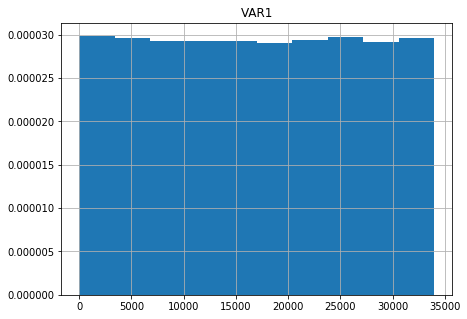

<Figure size 432x288 with 0 Axes>

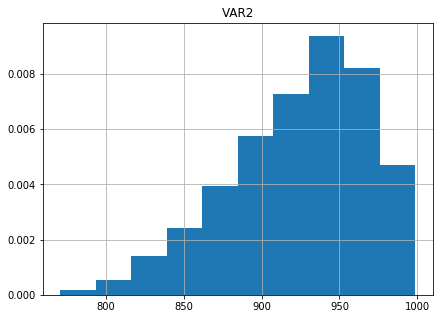

<Figure size 432x288 with 0 Axes>

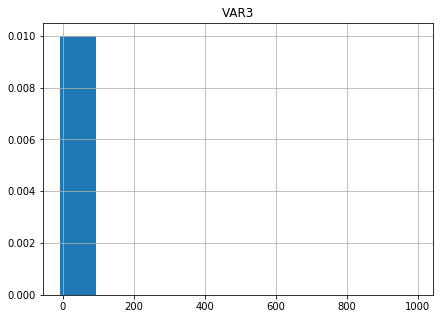

<Figure size 432x288 with 0 Axes>

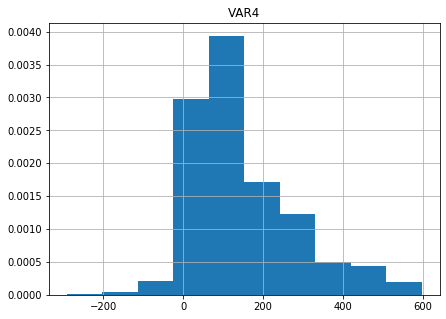

<Figure size 432x288 with 0 Axes>

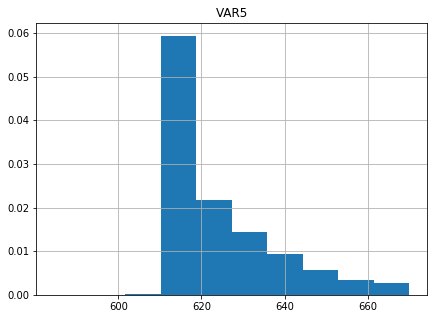

<Figure size 432x288 with 0 Axes>

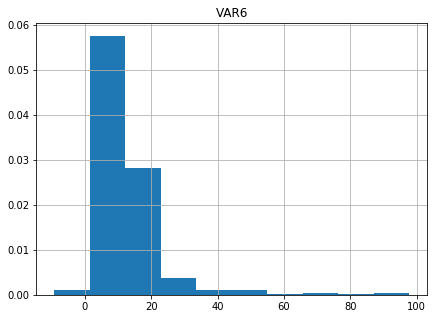

<Figure size 432x288 with 0 Axes>

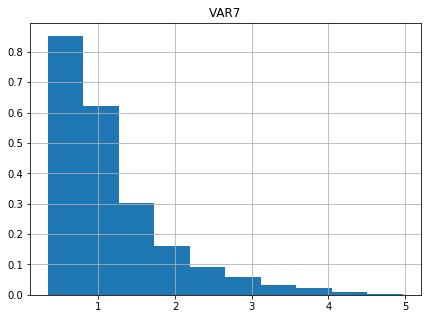

<Figure size 432x288 with 0 Axes>

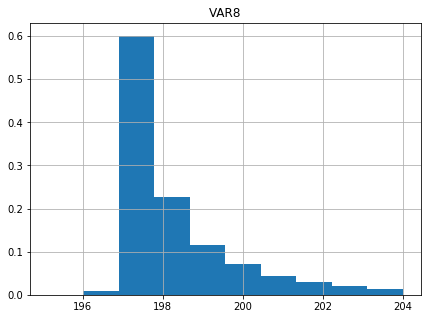

<Figure size 432x288 with 0 Axes>

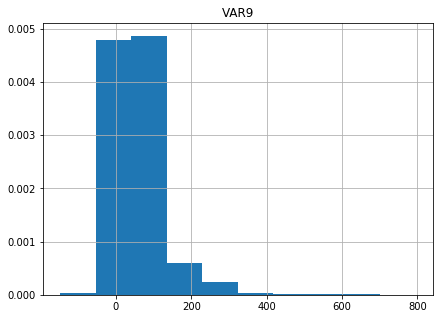

<Figure size 432x288 with 0 Axes>

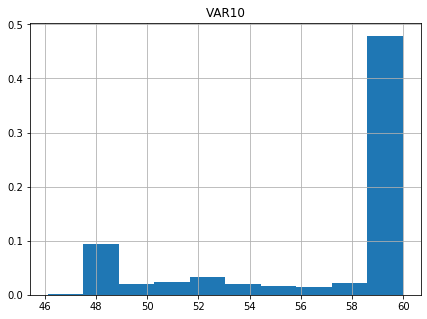

<Figure size 432x288 with 0 Axes>

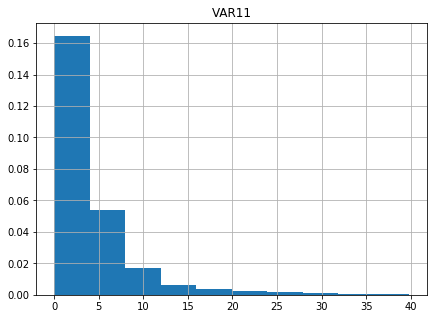

<Figure size 432x288 with 0 Axes>

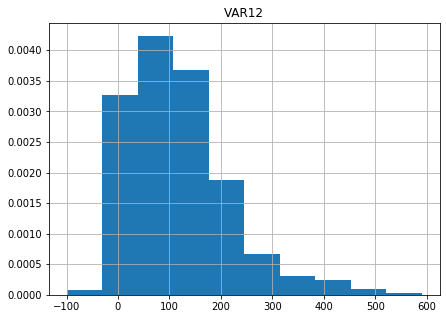

<Figure size 432x288 with 0 Axes>

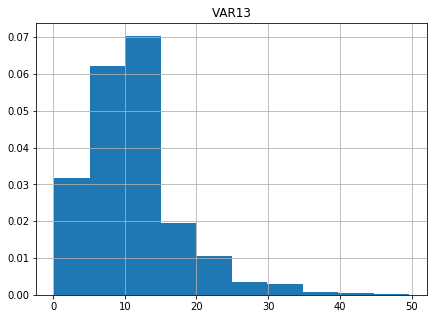

<Figure size 432x288 with 0 Axes>

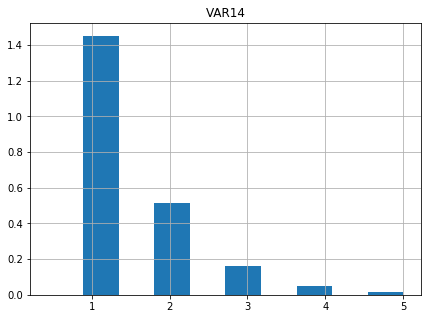

<Figure size 432x288 with 0 Axes>

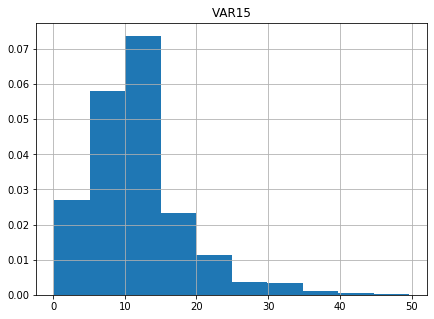

<Figure size 432x288 with 0 Axes>

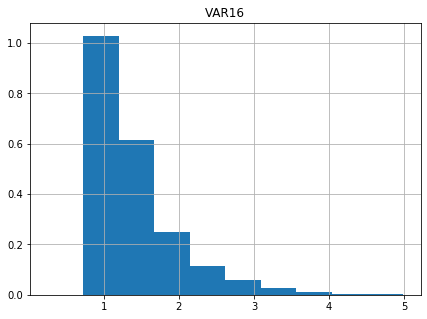

<Figure size 432x288 with 0 Axes>

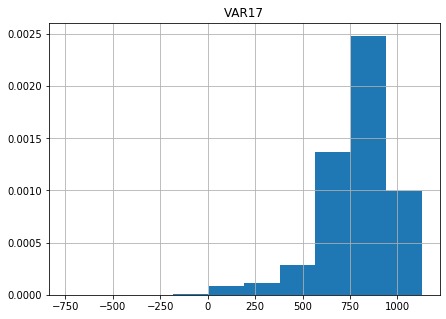

<Figure size 432x288 with 0 Axes>

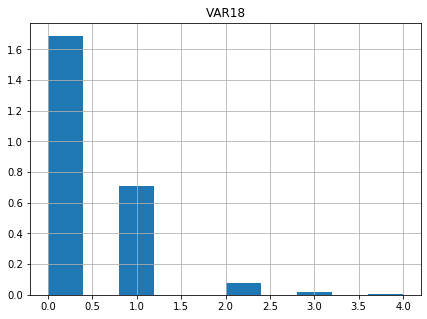

<Figure size 432x288 with 0 Axes>

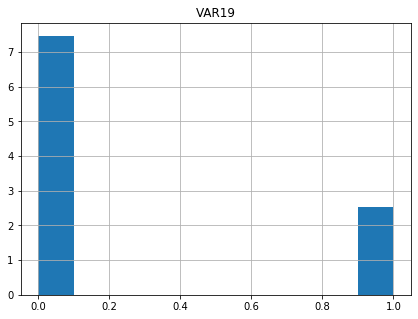

<Figure size 432x288 with 0 Axes>

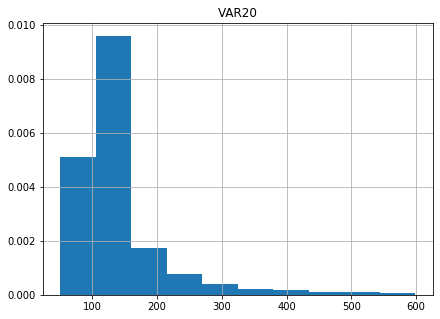

In [207]:
for i in df_exp.columns[:-1]:
    plt.figure()
    df_exp.hist(column=i,figsize=(7,5),normed=True)

In [175]:
df_exp.shape

(24497, 22)

In [176]:
df_exp.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503,High


### Class Imbalance

Text(0, 0.5, 'Frequency')

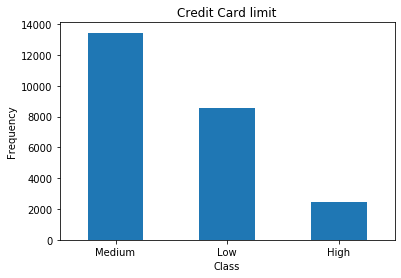

In [177]:
count_classes = pd.value_counts(df_exp['VAR21'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Credit Card limit")

#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [178]:
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [179]:
#!pip install imblearn

In [180]:
#Create independent and Dependent Features
columns = df_exp.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["VAR21"]]
# Store the variable we are predicting 
target = "VAR21"
# Define a random state 
state = np.random.RandomState(42)
X = df_exp[columns]
Y = df_exp[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(24497, 21)
(24497,)


In [181]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [182]:
X_res.shape,y_res.shape

((37572, 21), (37572,))

In [183]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'Medium': 13444, 'Low': 8578, 'High': 2475})
Resampled dataset shape Counter({'High': 13123, 'Low': 12295, 'Medium': 12154})


In [184]:
os =  RandomOverSampler(random_state=42)

In [185]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [186]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({'Medium': 13444, 'Low': 8578, 'High': 2475})
Resampled dataset shape Counter({'Low': 13444, 'High': 13444, 'Medium': 13444})


Text(0, 0.5, 'Frequency')

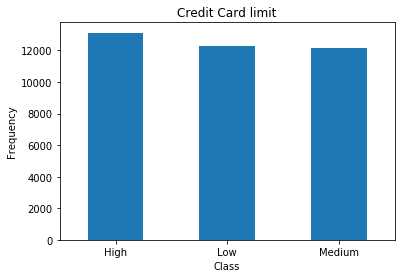

In [187]:
n_count_classes = pd.value_counts(y_res, sort = True)

n_count_classes.plot(kind = 'bar', rot=0)

plt.title("Credit Card limit")

#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
%store X_res

In [ ]:
%store y_res

In [201]:
dfxy = pd.DataFrame(X_res)

In [202]:
dfxy.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991
1,1.0,2.0,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,5.432857,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045
2,2.0,3.0,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570
3,3.0,4.0,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,4.643820,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306
4,4.0,5.0,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,5.434610,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503


In [203]:
dfxy['class'] = y_res

In [204]:
dfxy.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,0.0,1.0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991,Low
1,1.0,2.0,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045,High
2,2.0,3.0,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570,Medium
3,3.0,4.0,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306,Low
4,4.0,5.0,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503,High


In [205]:
dfxy.shape

(37572, 22)

In [206]:
dfxy.to_csv('itrImputed_NoOut_CB.csv')